#QUANTIUM task1

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sb
import squarify
import matplotlib.pyplot as plt
from pywaffle import Waffle
import datetime as dt
import matplotlib.dates as mdates
import re


In [3]:
#Reading the purchase behaviour file
data1=pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
data1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
data1.isnull().sum().sort_values(ascending=False)

PREMIUM_CUSTOMER    0
LIFESTAGE           0
LYLTY_CARD_NBR      0
dtype: int64

In [6]:
#Reading the transaction data file
data2=pd.read_excel('QVI_transaction_data.xlsx')

In [7]:
data2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
data2['DATE'] = pd.TimedeltaIndex(data2['DATE'], unit='D') + dt.datetime(1899, 12, 30)


In [9]:
data2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
data2.describe().round(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00,264836.00,264836.00,264836.00,264836.00,264836.00
mean,135.08,135549.48,135158.31,56.58,1.91,7.30
std,76.78,80579.98,78133.03,32.83,0.64,3.08
min,1.00,1000.00,1.00,1.00,1.00,1.50
25%,70.00,70021.00,67601.50,28.00,2.00,5.40
50%,130.00,130357.50,135137.50,56.00,2.00,7.40
75%,203.00,203094.25,202701.25,85.00,2.00,9.20
max,272.00,2373711.00,2415841.00,114.00,200.00,650.00


In [11]:
data2['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [12]:
data2['PROD_SIZE'] = [re.search(r"\d+(g|G)", p).group(0).replace('G','').replace('g','')
                      for p in data2['PROD_NAME']]


In [13]:
data2 = data2[~data2['PROD_NAME'].isin(['Old El Paso Salsa   Dip Tomato Mild 300g',
'Old El Paso Salsa   Dip Chnky Tom Ht300g',
'Woolworths Mild     Salsa 300g',
'Old El Paso Salsa   Dip Tomato Med 300g',
'Woolworths Medium   Salsa 300g',
'Doritos Salsa Mild  300g',
'Doritos Salsa       Medium 300g'])].reset_index(drop=True)

In [14]:
def replaceWords(text):
    # specific
    text = re.sub(r"SeaSalt", "Sea Salt", text)
    text = re.sub(r"Frch/Onin", "French Onion", text)
    text = re.sub(r"Cheddr Mstrd", "Cheddar Mustard", text)
    text = re.sub(r"Jlpno Chili", "Jalapeno Chilli", text)
    text = re.sub(r"Swt/Chlli Sr/Cream", "Sweet Chilli Sour Cream", text)
    text = re.sub(r"SourCream", "Sour Cream", text)
    text = re.sub(r"Tmato Hrb Spce", "Tomato Herb Spice", text)
    text = re.sub(r"S/Cream", "Sour Cream", text)
    text = re.sub(r"ChipsFeta", "Chips Feta", text)
    text = re.sub(r"ChpsHny", "Chips Honey", text)
    text = re.sub(r"FriedChicken", "Fried Chicken", text)
    text = re.sub(r"OnionDip", "Onion Dip", text)
    text = re.sub(r"SweetChili", "Sweet Chilli", text)
    text = re.sub(r"PotatoMix", "Potato Mix", text)
    text = re.sub(r"Seasonedchicken", "Seasoned Chicken", text)
    text = re.sub(r"CutSalt/Vinegr", "Cut Salt Vinegar", text)
    text = re.sub(r"ChpsBtroot", "Chips Beetroot", text)
    text = re.sub(r"ChipsBeetroot", "Chips Beetroot", text)
    text = re.sub(r"ChpsFeta", "Chips Feta", text)
    text = re.sub(r"OnionStacked", "Onion Stacked", text)
    text = re.sub(r"Ched", "Cheddar", text)
    text = re.sub(r"Strws", "Straws", text)
    text = re.sub(r"Slt", "Salt", text)
    text = re.sub(r"Chikn", "Chicken", text)
    text = re.sub(r"Rst", "Roast", text)
    text = re.sub(r"Vinegr", "Vinegar", text)
    text = re.sub(r"Mzzrlla", "Mozzarella", text)
    text = re.sub(r"Originl", "Original", text)
    text = re.sub(r"saltd", "Salted", text)
    text = re.sub(r"Swt", "Sweet", text)
    text = re.sub(r"Chli", "Chilli", text)
    text = re.sub(r"Hony", "Honey", text)
    text = re.sub(r"Chckn", "Chicken", text)
    text = re.sub(r"Chp", "Chip", text)
    text = re.sub(r"Btroot", "Beetroot", text)
    text = re.sub(r"Chs", "Cheese", text)
    text = re.sub(r"Crm", "Cream", text)
    text = re.sub(r"Orgnl", "Original", text)

    return text

data2['PROD_NAME'] = [replaceWords(s) for s in data2['PROD_NAME']]

data2['PROD_NAME'].replace('Infzns Crn Crnchers Tangy Gcamole',
'Infuzions Corn Crunchers Tangy Guacamole', inplace=True)

### Extract Product Brand

In [15]:
def replaceBrands(text):
    # specific
    text = re.sub(r"Red Rock Deli", "RRD", text)
    text = re.sub(r"Dorito", "Doritos", text)
    text = re.sub(r"Doritoss", "Doritos", text)
    text = re.sub(r"Smith", "Smiths", text)
    text = re.sub(r"Smithss", "Smiths", text)
    text = re.sub(r"GrnWves", "Grain Waves", text)
    text = re.sub(r"Woolworths", "WW", text) 
    text = re.sub(r"Snbts", "Sunbites", text) 

    return text

# standardize common brand names
data2['PROD_NAME'] = [replaceBrands(s) for s in data2['PROD_NAME']]

# get brand name from first word
data2['brand'] = [s.split(' ')[0] for s in data2['PROD_NAME']]

In [16]:
data2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny Sea Salt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Sour Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chips Honey&Jalapeno Chilli 150g,3,13.8,150,Kettle


#### Checking missing values in each column

   - We can have a insight now that, the data set seems to be a perfect data set with no null values       which is quite rare in real life environment

In [17]:
data2.isnull().sum().sort_values(ascending=False)

brand             0
PROD_SIZE         0
TOT_SALES         0
PROD_QTY          0
PROD_NAME         0
PROD_NBR          0
TXN_ID            0
LYLTY_CARD_NBR    0
STORE_NBR         0
DATE              0
dtype: int64

### Remove outliers

In [18]:
# remove outlier
data2 = data2[data2['PROD_QTY'] < 200].reset_index(drop=True)
data2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny Sea Salt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Sour Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chips Honey&Jalapeno Chilli 150g,3,13.8,150,Kettle


### By Brand

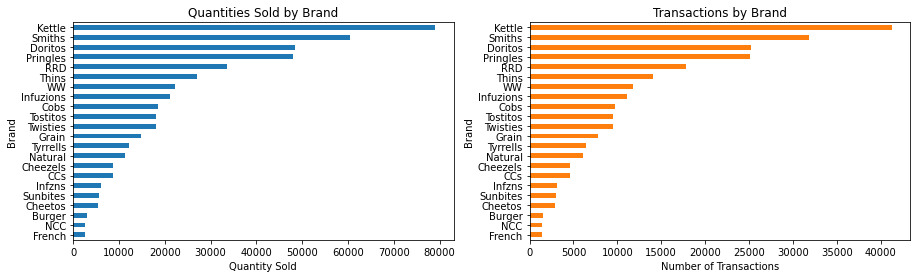

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# Product quantity sales by brand
ax1=plt.subplot(121)
data2.groupby(['brand'], as_index=False).agg({'PROD_QTY': 'sum'}).sort_values('PROD_QTY').plot.barh(x='brand',legend=False, ax=ax1)

ax1.set_xlabel('Quantity Sold')
ax1.set_ylabel('Brand')
ax1.set_title('Quantities Sold by Brand')

ax2=plt.subplot(122)
data2.groupby(['brand'], as_index=False)[['TXN_ID']].count().sort_values('TXN_ID').plot.barh(x='brand',color='#ff7f0e', legend=False, ax=ax2)
ax2.set_xlabel('Number of Transactions')
ax2.set_ylabel('Brand')
ax2.set_title('Transactions by Brand')

plt.show()

-  It appears that Kettle is the brand that has the highest quantities sold, followed by Smiths. French Fries and The Natural Chip Co. came in last and second last respectively. 

### By Date

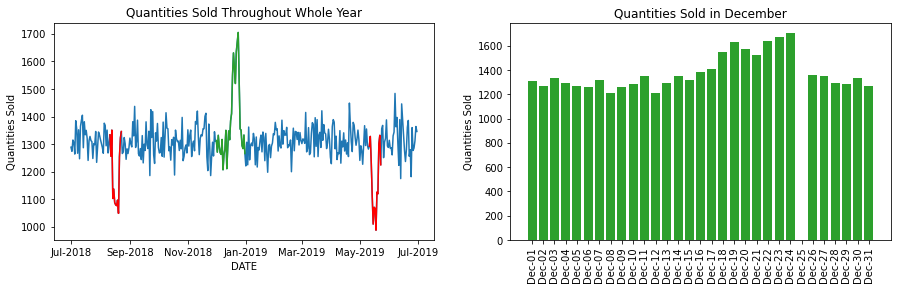

In [20]:
## Plot quantities sold by date
bydate = data2.groupby('DATE').agg({'PROD_QTY': 'sum'}).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax1=plt.subplot(121)
sb.lineplot(x="DATE", y="PROD_QTY", data=bydate, ax=ax1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
sb.lineplot(x="DATE", y="PROD_QTY", data=bydate[(bydate['DATE'] > '2018-11-30') & (bydate['DATE'] < '2019-01-01')], color='#2ca02c', ax=ax1)
sb.lineplot(x="DATE", y="PROD_QTY", data=bydate[(bydate['DATE'] > '2018-08-10') & (bydate['DATE'] < '2018-08-24')], color='red', ax=ax1)
sb.lineplot(x="DATE", y="PROD_QTY", data=bydate[(bydate['DATE'] > '2019-05-10') & (bydate['DATE'] < '2019-05-24')], color='red', ax=ax1)
plt.ylabel('Quantities Sold')
plt.title('Quantities Sold Throughout Whole Year')


## Plot December quantities sold
# filter december
december = bydate[bydate['DATE'].isin(pd.date_range(start="2018-12-01",end="2018-12-31").tolist())]

# fill in missing dec data
december = december.set_index('DATE').reindex(pd.date_range(start="2018-12-01",end="2018-12-31"), fill_value=0)

ax2=plt.subplot(122)
ax2.bar(december.index,december['PROD_QTY'],color='#2ca02c')
ax2.set_xticks(december.index)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%b-%d"))
ax2.tick_params(axis='x', rotation=90) 
plt.ylabel('Quantities Sold')
plt.title('Quantities Sold in December')
plt.show()

### By Product Size

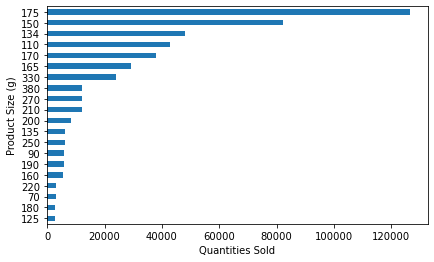

In [21]:
# Product Size

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,4))

ax1=plt.subplot(121)
data2.groupby('PROD_SIZE').agg({'PROD_QTY': 'sum'}).sort_values('PROD_QTY').reset_index().plot.barh(x='PROD_SIZE', legend=False, ax=ax1)
ax1.set_ylabel('Product Size (g)')
ax1.set_xlabel('Quantities Sold')

plt.show()

## Purchase Behaviour

In [22]:
data1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


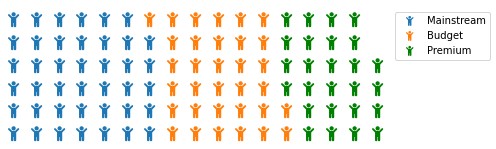

In [23]:

## Waffle chart for customer class
cust_class = dict(data1['PREMIUM_CUSTOMER'].value_counts()/len(data1)*100)

plt.figure(figsize=(7,5),
    FigureClass=Waffle, 
    rows=6, 
    values=cust_class, 
    colors=["#1f77b4", "#ff7f0e", "green"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', 
    font_size=15, 
    icon_legend=True)
    
plt.show()

### LIFESTAGE

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

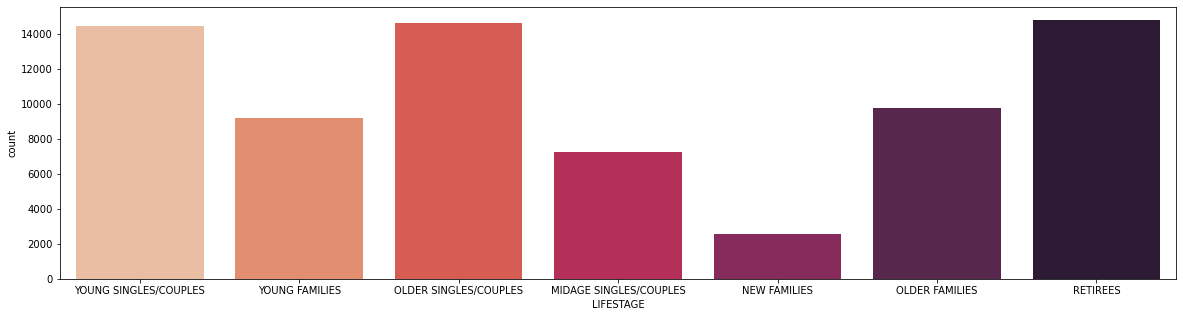

In [24]:
plt.figure(figsize=(20,5))
sb.countplot(data1['LIFESTAGE'],palette='rocket_r')

### RELATION BETWEEN LIFESTAGE AND PREMIUM CUSTOMER

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

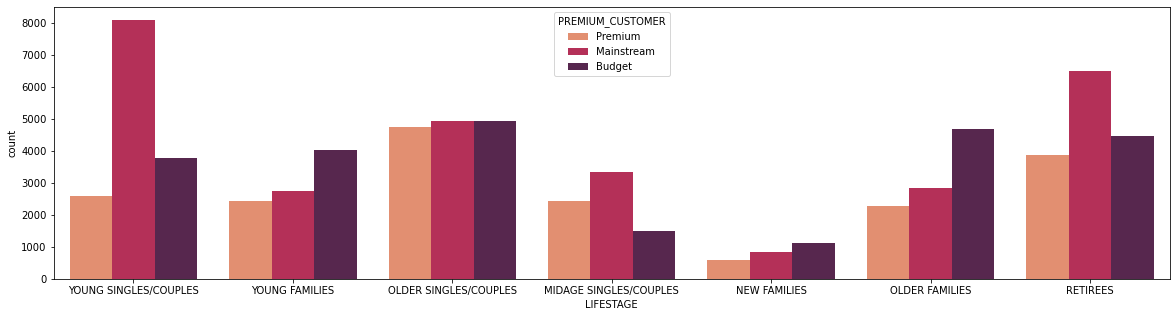

In [29]:
plt.figure(figsize=(20,5))
sb.countplot(data1['LIFESTAGE'],palette='rocket_r',hue=data1['PREMIUM_CUSTOMER'])

- Maximum number of transactions are done by Mainstream Young Single/Couples.
- More people are up to Mainstream section follwed by Budget. 

<AxesSubplot:title={'center':'Customer Lifestage Demographics'}>

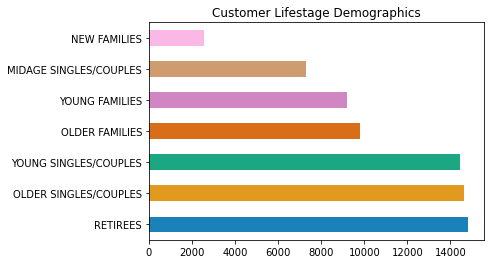

In [25]:
# Plot customer lifestage counts
data1.LIFESTAGE.value_counts().plot(kind='barh', alpha=.9, color=sb.color_palette("colorblind"), title='Customer Lifestage Demographics')

### MERGE THE DATA

In [26]:
data_mr = data2.merge(data1, on='LYLTY_CARD_NBR')

In [27]:
#Null value check
data_mr.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PROD_SIZE           0
brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

- There has been no null values preset in the entire dataset data_mr

<AxesSubplot:>

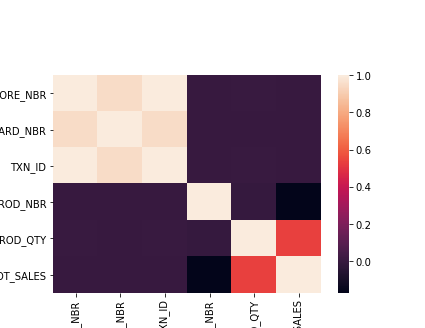

In [28]:
#Correlation plot
corr=data_mr.corr()

sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)